In [1]:
import matplotlib.pyplot as plt

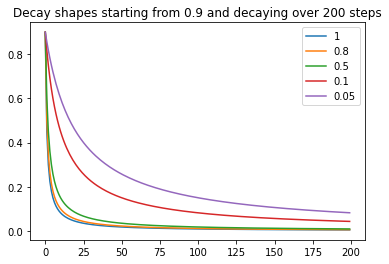

In [11]:
start = 0.9
# decay_factor = 0.5
period = 200

for decay_factor in [1, 0.8, 0.5, 0.1, 0.05]:
    y = []
    x = []
    for i in range(period):
        x.append(i)
        y.append(start/(1 + decay_factor*i))

    plt.plot(x, y, label=decay_factor)

plt.legend()
plt.title("Decay shapes starting from 0.9 and decaying over 200 steps")
plt.show()

In [1]:
from game.game import Game``

In [8]:
from math import pow

In [3]:
game = Game()
board = game.start()
board

array([[0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0],
       [2, 0, 0, 0]])

In [14]:
pow(2, 20)

1048576.0

In [4]:
game.get_available_actions(board)

['right', 'up']

In [68]:
import numpy as np
import requests
import json

In [12]:
import random

board = np.zeros([4, 4], "int64")
# board[0] = [random.choice([0, 2, 4, 8]) for _ in range(4)]
# board[1] = [random.choice([0, 2, 4, 8]) for _ in range(4)]
# board[2] = [random.choice([0, 2, 4, 8]) for _ in range(4)]
# board[3] = [random.choice([0, 2, 4, 8]) for _ in range(4)]

board[0] = [0, 0, 0, 0]
board[1] = [0, 0, 0, 0]
board[2] = [0, 2, 4, 4]
board[3] = [0, 2, 0, 2]
board

array([[0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 2, 4, 4],
       [0, 2, 0, 2]])

In [13]:
def add_random(board, init=2):
    from random import choice
    available = []
    for row in range(len(board)):
        for col in range(len(board[0])):
            if board[row][col] == 0:
                available.append((row, col))
    
    selected = choice(available)
    board[selected[0]][selected[1]] = init
    return board

# board = add_random(board.copy())
board

array([[0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 2, 4, 4],
       [0, 2, 0, 2]])

In [16]:
def add_random(b_, init=2):
    board = b_.copy()
    from random import choice
    available = []
    for row in range(len(board)):
        for col in range(len(board[0])):
            if board[row][col] == 0:
                available.append((row, col))
    
    selected = choice(available)
    board[selected[0]][selected[1]] = init
    return board

def collapse_row_right(row_):
    row = row_.copy()

    points = 0

    i = len(row) - 1
    while i > 0:
        if row[i] != 0:
            for j in range(i-1, -1, -1):
                # print(f"Compare {row[i]}({i}) and {row[j]}({j})")
                if row[i] == row[j]:
                    row[i] = row[i] + row[j]
                    points += row[i]
                    row[j] = 0
                    i = j
                    break
                if row[j] != 0:
                    break
        i -= 1

    found_item = False
    for i in range(len(row)):

        if row[i] == 0 and found_item:
            for j in range(i, 0, -1):
                row[j] = row[j-1]
            row[0] = 0

        found_item = row[i] != 0
    
    return row, points

def shift_right(b_):
    board = b_.copy()
    points = 0
    for row_num in range(len(board)):
        board[row_num], p = collapse_row_right(list(board[row_num]))
        points += p
    return add_random(board), points

def shift_left(b_):
    board = b_.copy()
    points = 0
    for row_num in range(len(board)):
        new_row, p = collapse_row_right(list(board[row_num])[::-1])
        new_row = new_row[::-1]
        board[row_num] = new_row
        points += p
    return add_random(board), points

def shift_down(b_):
    board = b_.copy()
    points = 0
    for col_num in range(len(board[0])):
        board[:, col_num], p = collapse_row_right(list(board[:, col_num]))
        points += p
    return add_random(board), points

def shift_up(b_):
    board = b_.copy()
    points = 0
    for col_num in range(len(board[0])):
        # display(board[:, col_num])
        new_col, p = collapse_row_right(list(board[:, col_num])[::-1])[::-1]
        new_col = new_col[::-1]
        board[:, col_num] = new_col
        points += p
    return add_random(board), points

display(board)
display(shift_right(board)[0])
print(shift_right(board)[1])
display(shift_left(board))
print(shift_left(board)[1])
# display(shift_down(board))
# display(shift_up(board))

array([[0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 2, 4, 4],
       [0, 2, 0, 2]])

array([[0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 2, 8],
       [0, 0, 2, 4]])

12


(array([[0, 0, 0, 0],
        [0, 0, 0, 0],
        [2, 8, 2, 0],
        [4, 0, 0, 0]]),
 12)

12


In [77]:
def send_action(type: str, board: np.array):
    assert isinstance(type, str) and type in ["up", "down", "left", "right"]
    url = f"http://localhost:5000/{type}"
    data = {"board": board.tolist()}
    headers = {'Content-type': 'application/json', 'Accept': 'text/plain'}
    r = requests.post(url, data=json.dumps(data), headers=headers)

    return np.array(r.json()["board"]), r.json()["points"]

In [73]:
url = "http://localhost:5000/init"
r = requests.get(url)
r.status_code

board, points = r.json()
board = np.array(board)

print("POINTS:", points)
display(board)

POINTS: 0


array([[0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 2, 0],
       [0, 0, 0, 0]])

In [85]:
board, points = send_action("down", board)
print("POINTS:", points)
display(board)

POINTS: 4


array([[0, 0, 0, 0],
       [0, 0, 0, 0],
       [4, 0, 0, 0],
       [8, 4, 0, 2]])